# Khai Báo Thư Viện

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from celluloid import Camera

# Evaluations


In [ ]:
#Sphere
def f_sphere(x):
  result = 0
  for i in range(len(x)):
    result += x[i]*x[i]
  return result

def F_sphere(x, y): 
  return x*x + y*y

In [ ]:
#Rastrigin
def f_rastrigin(x):
  result = 10 * len(x)
  for i in range(len(x)):
    result += (x[i]*x[i] - 10 * np.cos(2*np.pi*x[i]))
  return result

def F_rastrigin(x, y):
  return 20 + (x*x - (10 * np.cos(2*np.pi*x))) + (y*y -(10 * np.cos(2*np.pi*y))) 

In [ ]:
#Rosenbrock
def f_rosenbrock(x):
  result = 0
  for i in range(1, len(x)):
    result += (100 *pow((x[i] - x[i-1]*x[i-1]),2) + pow(x[i-1] - 1, 2))
  return result

def F_rosenbrock(x, y):
  return (100 *pow((0 - x*x),2) + pow(x - 1, 2)) + (100 *pow((0 - y*y),2) + pow(y - 1, 2))


In [ ]:
#Griewank
def f_griewank(x):
  result, result_ = 0, 1
  for i in range(len(x)):
    result += x[i]*x[i]/4000
    result_ *= np.cos(x[i]/np.sqrt(i + 1))
  return result - result_ + 1

def F_griewank(x, y):
  return (x*x/4000 - np.cos(x) + 1) + (y*y/4000 - np.cos(y) + 1)


In [ ]:
#Ackley
def f_ackley(x):
  a, b, c, d = 20, 0.2, 2*np.pi, len(x)
  result, result_ = 0, 0
  for i in range(len(x)):
    result += x[i]*x[i]
    result_ += np.cos(c*x[i])
  return (-a)*np.exp((-b)*np.sqrt((1/d)*result)) - np.exp((1/d)*result_) + a + np.exp(1)

def F_ackley(x, y):
  a, b, c, d = 20, 0.2, 2*np.pi, 1
  return (-a)*np.exp((-b)*np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(c*x) + np.cos(c*y))) + np.exp(1) + a

# DE & ES


In [ ]:
def ES_f(fobj, bounds,  sigma, c_inc, c_dec, popsize):
  dimensions = len(bounds)

  lower_bound, upper_bound = np.asarray(bounds).T
  diff = np.fabs(lower_bound - upper_bound)

  mu = lower_bound + diff * np.random.rand(dimensions)
  mu_fitness = fobj(mu)

  results = []
  all_pops = []
  results.append((np.copy(mu), mu_fitness))

  n_call = 0
  n_call_idx = [0]
  best_n_call_index = 0

  key = 0
  gif_all_pops = []
  while(1):
      pre_key = key
      epsilon = np.random.randn(popsize, dimensions)
      offspring = mu + sigma * epsilon
      offspring = np.clip(offspring, lower_bound, upper_bound)
      offspring_fitness = np.asarray([fobj(offspring[i]) for i in range(popsize)])
      n_call += popsize
      
      best_idx = offspring_fitness.argmin()
      best_fitness = offspring_fitness[best_idx]
      best_offspring = offspring[best_idx]

      if best_fitness <= mu_fitness:
          mu = best_offspring.copy()
          mu_fitness = best_fitness
          best_n_call_index = n_call
          sigma *= c_inc
          key = best_fitness
          

      else:
          sigma *= c_dec
      if pre_key!=key and pre_key >= key: gif_all_pops.append(np.copy(offspring))
      n_call_idx.append(best_n_call_index)
      results.append((np.copy(mu), mu_fitness))
      all_pops.append(np.copy(offspring))
      if len(bounds) == 2: 
        if n_call >= 100001: return results, all_pops, n_call_idx, gif_all_pops
      else:
        if n_call >= 1000001: return results, all_pops, n_call_idx, gif_all_pops

  return results, all_pops, n_call_idx, gif_all_pops



In [ ]:
def de(fobj, bounds, F_scale, cross_prob, popsize):
  dimensions = len(bounds)

  lower_bound, upper_bound = np.asarray(bounds).T
  
  diff = np.fabs(lower_bound - upper_bound)
  
  pop = lower_bound + diff * np.random.rand(popsize, dimensions)
  
  fitness = np.asarray([fobj(ind) for ind in pop])
  
  best_idx = np.argmin(fitness)
  
  best = pop[best_idx]

  results = []
  
  all_pops = []

  results.append((np.copy(best), fitness[best_idx]))

  all_pops.append(np.copy(pop))

  n_call = 0

  best_n_idx = 0

  n_call_idx = [0]

  key = 0
  gif_all_pops = []

  while(1):
      pre_key = key
      for j in range(popsize):
          idxs = [idx for idx in range(popsize) if idx != j]
          a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
          mutant = np.clip(a + F_scale*(b-c), lower_bound, upper_bound)

          cross_points = np.random.rand(dimensions) < cross_prob
          if not np.any(cross_points):
              cross_points[np.random.randint(0, dimensions)] = True

          trial = np.where(cross_points, mutant, pop[j])
          f = fobj(trial)
          n_call += 1
          if f < fitness[j]:
              pop[j] = trial
              fitness[j] = f 
              if f < fitness[best_idx]:
                  best = trial
                  best_idx = j
                  best_n_idx = n_call
                  key = f
                  
      if pre_key != key and key < pre_key:
        gif_all_pops.append(np.copy(pop))
      n_call_idx.append(best_n_idx)
      results.append((np.copy(best), fitness[best_idx]))
      all_pops.append(np.copy(pop) )
      if fitness[best_idx] == 0:
        return results, all_pops, n_call_idx, gif_all_pops
      if len(bounds) == 2: 
        if n_call >= 100001: return results, all_pops, n_call_idx, gif_all_pops
      else:
        if n_call >= 1000001: return results, all_pops, n_call_idx, gif_all_pops

  return results, all_pops, n_call_idx, gif_all_pops

# Example

Nơi đây chứa đựng các code xàm xí


In [ ]:
results, all_pops, n_call, XX = de(f_ackley, bounds = [(-32.768, 32.768)]*2, popsize = 32)
print(len(results), len(n_call))

TypeError: de() missing 2 required positional arguments: 'F_scale' and 'cross_prob'

In [ ]:
x, f = zip(*results)

In [ ]:
plt.plot(f)

In [ ]:
np.mean(np.array(list(f)))

In [ ]:
#Example
n_ex =[128, 1024]
data_example = []
data_call = []
out_put_data = []
for _ in range(2):
  temp = []
  temp_call = []
  for i in range(10):
    np.random.randint(19520197, 19520207)
    results, all_pops, n_call = de(f_rosenbrock, bounds = [(-2.048, 2.048)]*2, popsize = n_ex[_])
    x, f = zip(*results)
    temp.append(list(f))
    temp_call.append(n_call)
  #for i in range(len(temp)):
    #out_put_data.append([temp[i], temp_call[i]])
  #out_put_data.sort(reverse=True)
  #dt_ex = []
  #dt_call = []
  #for i in range(len(out_put_data)):
    #dt_ex.append(out_put_data[i][0])
    #dt_call.append(out_put_data[i][1])
    #if out_put_data[i][0] == 0:
      #break

  data_example.append(temp)
  data_call.append(temp_call)
#plotting(data_example, 'f_rosenbrock', data_call, "DE")


In [ ]:
for i in data_call:
  for j in i:
    print(len(j))

In [ ]:
raw_x = [i for i in range(0, 10001, 1000)]
raw_y = []
for _ in range(2):
  temp_raw_y = []
  for i in range(10):
    temp_raw_y.append(np.interp(raw_x, data_call[_][i], data_example[_][i]))
  raw_y.append(temp_raw_y)


In [ ]:
for _ in raw_y:
  print(len(_[0]))
print(raw_y[0][0][0])

In [ ]:
final_y = []
final_x = [raw_x, raw_x]
for _ in range(2):
  rraw_y = []
  for i in range(len(raw_y[_][0])):
    t_ = 0
    for j in range(len(raw_y[_])):
      t_ += raw_y[_][j][i]
    t_ /= 10
    rraw_y.append(t_)
  final_y.append(rraw_y)
final_y


In [ ]:
plotting(final_y, 'f_rosenbrock', final_x, "DE", 2)

In [ ]:
x, f = zip(*results)
#print(type(f))
print(x[0], f[0])
plt.plot(f)

In [ ]:
x = np.linspace(-32.768, 32.768, 100)
y = np.linspace(-32.768, 32.768, 100)
X, Y = np.meshgrid(x,y)
print(X, Y)
Z = F_ackley(X, Y)

[[-32.768     -32.1060202 -31.4440404 ...  31.4440404  32.1060202
   32.768    ]
 [-32.768     -32.1060202 -31.4440404 ...  31.4440404  32.1060202
   32.768    ]
 [-32.768     -32.1060202 -31.4440404 ...  31.4440404  32.1060202
   32.768    ]
 ...
 [-32.768     -32.1060202 -31.4440404 ...  31.4440404  32.1060202
   32.768    ]
 [-32.768     -32.1060202 -31.4440404 ...  31.4440404  32.1060202
   32.768    ]
 [-32.768     -32.1060202 -31.4440404 ...  31.4440404  32.1060202
   32.768    ]] [[-32.768     -32.768     -32.768     ... -32.768     -32.768
  -32.768    ]
 [-32.1060202 -32.1060202 -32.1060202 ... -32.1060202 -32.1060202
  -32.1060202]
 [-31.4440404 -31.4440404 -31.4440404 ... -31.4440404 -31.4440404
  -31.4440404]
 ...
 [ 31.4440404  31.4440404  31.4440404 ...  31.4440404  31.4440404
   31.4440404]
 [ 32.1060202  32.1060202  32.1060202 ...  32.1060202  32.1060202
   32.1060202]
 [ 32.768      32.768      32.768     ...  32.768      32.768
   32.768    ]]


In [ ]:
print(len(all_pops[1]))

1024


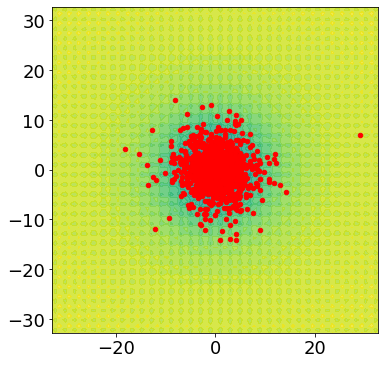

In [ ]:
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, Z, 20, cmap = 'viridis', alpha = 0.8)
plt.axis('square')

generation = 10

plt.scatter(all_pops[generation][:,0], all_pops[generation][:,1], s=20, c='red')

# Vẽ Graph

Thay tên các biến cần vẽ vào nhé. Chỉ cần thay thôi

In [ ]:
def plotting(data_for_plot, name_function, data_call, name_optimize_function, nums_, std_y_):
  x1 = np.array(data_call[0])
  x2 = np.array(data_call[1])
  y1 = np.array(data_for_plot[0])
  err = np.array(std_y_[0])
  y1_err = [err for i in range(len(y1))]
  y2 = np.array(data_for_plot[1])
  err = np.array(std_y_[1])
  y2_err = [err for i in range(len(y2))]
  draw_graph([x1,x2], y1, y1_err, y2, y2_err, name_function, name_optimize_function, nums_)


Nhớ thay tên title này kia nhé, tên file lưu nữa


In [ ]:
def draw_graph(x, y1, y1_err, y2, y2_err, name_function, name_optimize_function, nums_):
  fig = plt.figure(figsize=(10,5))
  plt.rcParams["font.size"] = 18

  ax = plt.subplot(111)
  ax.plot(x[0], y1, "b-", label = f'{name_optimize_function} with n = 128')
  ax.fill_between(x[0] , y1 + y1_err, y1 - y1_err, alpha=0.2)
  ax.plot(x[1], y2, "g-", label = f'{name_optimize_function} with n = 1024')
  ax.fill_between(x[1], y2 + y2_err, y2 - y2_err, alpha=0.2)





  ax.minorticks_on() 
  ax.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
  ax.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

  ax.set_title(f"Errorbar_{name_function} with d={nums_}")
  ax.set_xlabel("Number of Evaluation Call")
  ax.set_ylabel("Objective Function")

  ax.grid()
  plt.legend(loc = 'best')
  plt.show()


  fig.savefig(f"{name_optimize_function}_{name_function}_d={nums_}.pdf",format="pdf", dpi=300)
  fig.savefig(f"{name_optimize_function}_{name_function}_d={nums_}.png",format="png", dpi=300)



# Tính Means

In [ ]:
def calculate_mean(average_de):
  return np.mean(average_de), np.std(average_de)
  

# Khai Báo Các Biến Và Xử Lý Biến

In [ ]:
def xuly_data(data_call, data_example, n, name):
  raw_x = [i for i in range(0, 50001 if n == 2 else 500001, 1000*n)]
  if name == 'f_rastrigin' and n == 10:
    raw_x = [i for i in range(0,1000001,10000)]
  raw_y = []
  final_std_y = []
  for _ in range(2):
    temp_raw_y = []
    for i in range(10):
      temp_raw_y.append(np.interp(raw_x, data_call[_][i], data_example[_][i]))
    raw_y.append(temp_raw_y)
  final_y = []
  final_x = [raw_x, raw_x]
  for _ in range(2):
    rraw_y = []
    for i in range(len(raw_y[_][0])):
      t_ = 0
      for j in range(len(raw_y[_])):
        t_ += raw_y[_][j][i]
      t_ /= 10
      rraw_y.append(t_)
      
    
    final_y.append(rraw_y)
    final_std_y.append(np.std(np.array(rraw_y), axis=0))
  return final_x, final_y, final_std_y
  

In [ ]:
num_individuals = [32,64, 128, 256, 512, 1024]
functions = [f_sphere, f_rastrigin, f_rosenbrock, f_griewank, f_ackley]
name_functions = ['f_sphere', 'f_rastrigin', 'f_rosenbrock', 'f_griewank', 'f_ackley']
bounds = [[(-5.12, 5.12)], [(-5.12, 5.12)],[(-2.048, 2.048)], [(-600, 600)], [(-32.768, 32.768)]]
n_elements = [2, 10]

# Chạy thực nghiệm

In [ ]:
# Chạy DE
mean_de = [] # size 60 với bước nhảy 6 cho 6 size => 5 bước nhảy => mỗi bước nhảy tương ứng name_functions => tới index 30 => lặp lại quy trình vì 30 đầu d = 2 và 30 sau d = 10
std_de = [] # size 60 với bước nhảy 6 cho 6 size => 5 bước nhảy => mỗi bước nhảy tương ứng name_functions => tới index 30 => lặp lại quy trình vì 30 đầu d = 2 và 30 sau d = 10
data_make_gif = [] 
ave_call = [] # trung bình số lần gọi hàm cũng size 60 giống tương tự mean_de và std_de
best_index = [] # đánh dấu vị trí best cho từng elements trong num_individuals """""" chưa dùng

for n_element in n_elements:
  
  for function in functions:
    data_for_plot = [] # N = 128 và N = 1024
    data_call = [] # lưu số lần call để vẽ theo size 128 và 1024
    f_128, f_1024 = 0, 0 # lưu rồi thì không lưu nữa 
    for size in num_individuals:
      print(f"Running DE with d = {n_element} ; function: {name_functions[functions.index(function)]} ; size = {size}")
      data_de = [] # lưu 10 cái means của 10 lần chạy sau đó tính trung bình
      temp = [] # lưu data để vẽ cho size = 128 và size = 1024
      temp_call = [] # lưu số lần gọi Evaluations size = 128 và size = 1024
      __call__ = [] # lưu trung bình số lần gọi hàm để lưu vào ave_call
      gif_flag = 0
      for i in range(10):
        np.random.randint(19520197, 19520207)
        results, all_pops, n_call, z = de(function, bounds[functions.index(function)]*n_element, 0.8, 0.7, size)
        #### Data for gif #####
        if n_element == 2 and gif_flag == 0:
          data_make_gif.append(all_pops) 
          gif_flag = 1 
        #######################
        x, f = zip(*results)
        ### Đảm bảo len = nhau để tính data không lỗi ### 
        fr = 0
        if len(f) < len(n_call): fr = len(f)
        else: fr = len(n_call)
        #################################################
        temp.append(list(f)[0:fr])
        temp_call.append(n_call[0:fr])
        data_de.append(np.mean(np.array(list(f))))     
        __call__.append(sum(n_call)//len(n_call))
        #################################################
      ### Lưu data và vẽ hình ###
      if size == 128 or size == 1024:
          if size == 128 and f_128 == 0:
            data_for_plot.append(temp)
            data_call.append(temp_call)
            f_128 = 1
            print("packed for 128 succesfully")
          if size == 1024 and f_1024 == 0:
            data_for_plot.append(temp)
            data_call.append(temp_call)
            f_1024 = 1
            x_, y_, final_std_y = xuly_data(data_call, data_for_plot, n_element, name_functions[functions.index(function)]) 
            print("packed for 1024 succesfully")
            print("---Drawing---")
            plotting(y_, name_functions[functions.index(function)], x_, "DE", n_element, final_std_y)
      ###########################
      mean, std = calculate_mean(np.array(data_de))
      mean_de.append(mean)
      std_de.append(std)
      ave_call.append(sum(__call__)//10)
      ###########################
      


      

      

      


Running ES with d = 2 ; function: f_sphere ; size = 32
Running ES with d = 2 ; function: f_sphere ; size = 64
Running ES with d = 2 ; function: f_sphere ; size = 128
packed for 128 succesfully
Running ES with d = 2 ; function: f_sphere ; size = 256
Running ES with d = 2 ; function: f_sphere ; size = 512
Running ES with d = 2 ; function: f_sphere ; size = 1024
packed for 1024 succesfully
---Drawing---


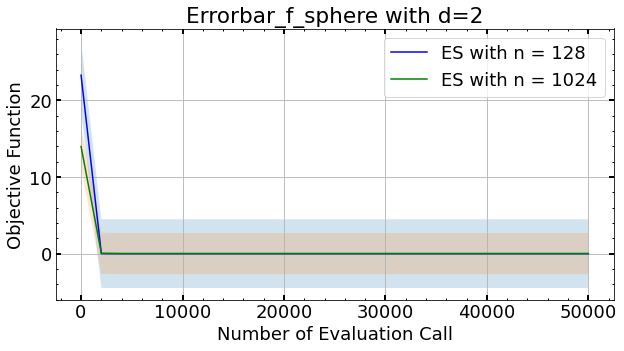

Running ES with d = 2 ; function: f_rastrigin ; size = 32
Running ES with d = 2 ; function: f_rastrigin ; size = 64
Running ES with d = 2 ; function: f_rastrigin ; size = 128
packed for 128 succesfully
Running ES with d = 2 ; function: f_rastrigin ; size = 256
Running ES with d = 2 ; function: f_rastrigin ; size = 512
Running ES with d = 2 ; function: f_rastrigin ; size = 1024
packed for 1024 succesfully
---Drawing---


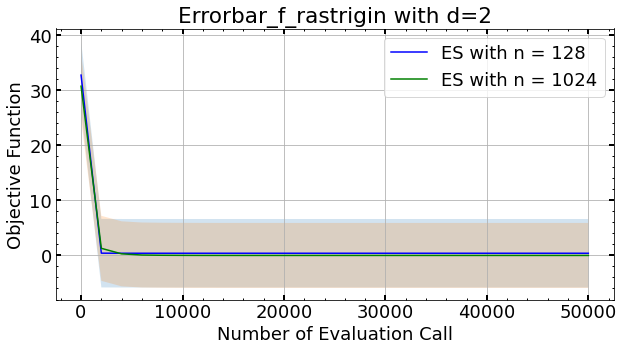

Running ES with d = 2 ; function: f_rosenbrock ; size = 32
Running ES with d = 2 ; function: f_rosenbrock ; size = 64
Running ES with d = 2 ; function: f_rosenbrock ; size = 128
packed for 128 succesfully
Running ES with d = 2 ; function: f_rosenbrock ; size = 256
Running ES with d = 2 ; function: f_rosenbrock ; size = 512
Running ES with d = 2 ; function: f_rosenbrock ; size = 1024
packed for 1024 succesfully
---Drawing---


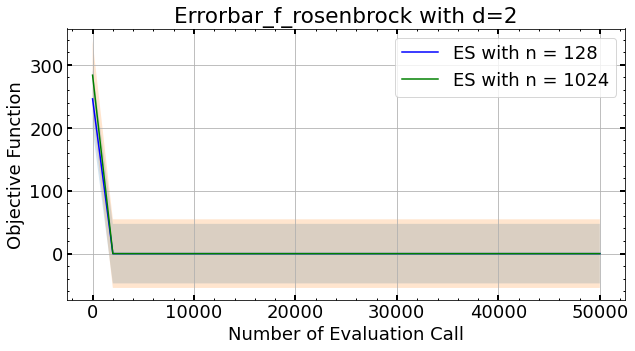

Running ES with d = 2 ; function: f_griewank ; size = 32
Running ES with d = 2 ; function: f_griewank ; size = 64
Running ES with d = 2 ; function: f_griewank ; size = 128
packed for 128 succesfully
Running ES with d = 2 ; function: f_griewank ; size = 256
Running ES with d = 2 ; function: f_griewank ; size = 512
Running ES with d = 2 ; function: f_griewank ; size = 1024
packed for 1024 succesfully
---Drawing---


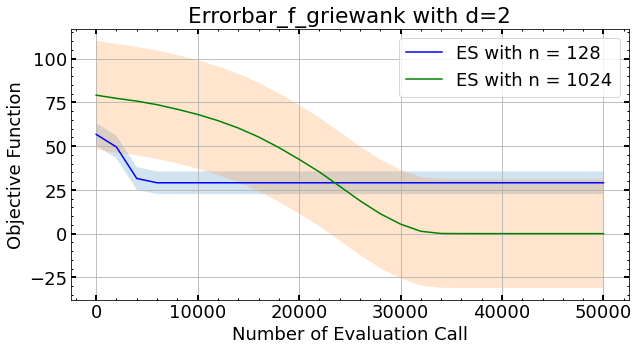

Running ES with d = 2 ; function: f_ackley ; size = 32
Running ES with d = 2 ; function: f_ackley ; size = 64
Running ES with d = 2 ; function: f_ackley ; size = 128
packed for 128 succesfully
Running ES with d = 2 ; function: f_ackley ; size = 256
Running ES with d = 2 ; function: f_ackley ; size = 512
Running ES with d = 2 ; function: f_ackley ; size = 1024
packed for 1024 succesfully
---Drawing---


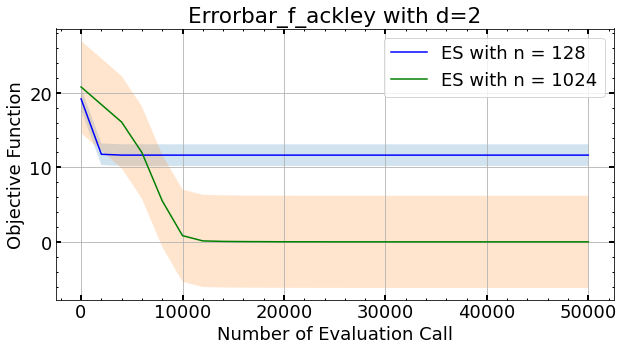

Running ES with d = 10 ; function: f_sphere ; size = 32
Running ES with d = 10 ; function: f_sphere ; size = 64
Running ES with d = 10 ; function: f_sphere ; size = 128
packed for 128 succesfully
Running ES with d = 10 ; function: f_sphere ; size = 256
Running ES with d = 10 ; function: f_sphere ; size = 512
Running ES with d = 10 ; function: f_sphere ; size = 1024
packed for 1024 succesfully
---Drawing---


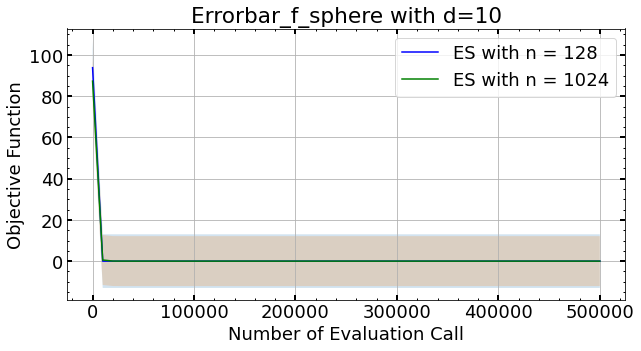

Running ES with d = 10 ; function: f_rastrigin ; size = 32
Running ES with d = 10 ; function: f_rastrigin ; size = 64
Running ES with d = 10 ; function: f_rastrigin ; size = 128
packed for 128 succesfully
Running ES with d = 10 ; function: f_rastrigin ; size = 256
Running ES with d = 10 ; function: f_rastrigin ; size = 512
Running ES with d = 10 ; function: f_rastrigin ; size = 1024
packed for 1024 succesfully
---Drawing---


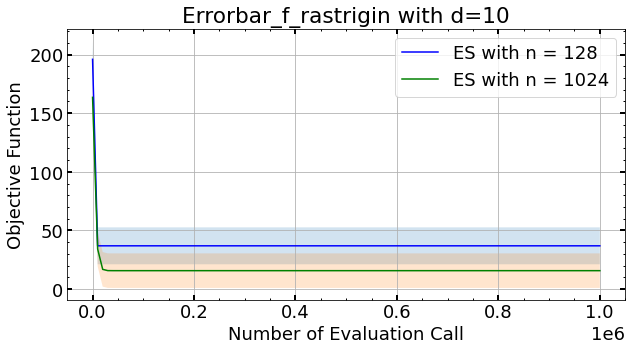

Running ES with d = 10 ; function: f_rosenbrock ; size = 32
Running ES with d = 10 ; function: f_rosenbrock ; size = 64
Running ES with d = 10 ; function: f_rosenbrock ; size = 128
packed for 128 succesfully
Running ES with d = 10 ; function: f_rosenbrock ; size = 256
Running ES with d = 10 ; function: f_rosenbrock ; size = 512
Running ES with d = 10 ; function: f_rosenbrock ; size = 1024
packed for 1024 succesfully
---Drawing---


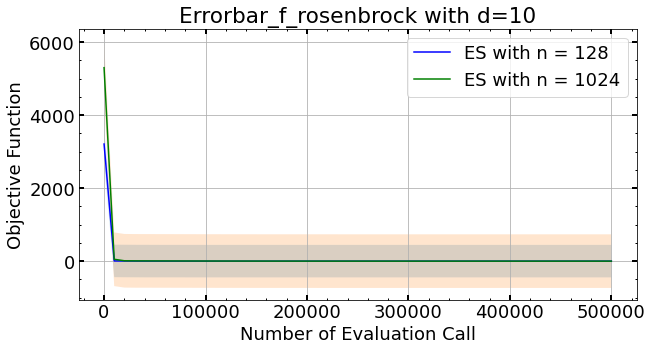

Running ES with d = 10 ; function: f_griewank ; size = 32
Running ES with d = 10 ; function: f_griewank ; size = 64
Running ES with d = 10 ; function: f_griewank ; size = 128
packed for 128 succesfully
Running ES with d = 10 ; function: f_griewank ; size = 256
Running ES with d = 10 ; function: f_griewank ; size = 512
Running ES with d = 10 ; function: f_griewank ; size = 1024
packed for 1024 succesfully
---Drawing---


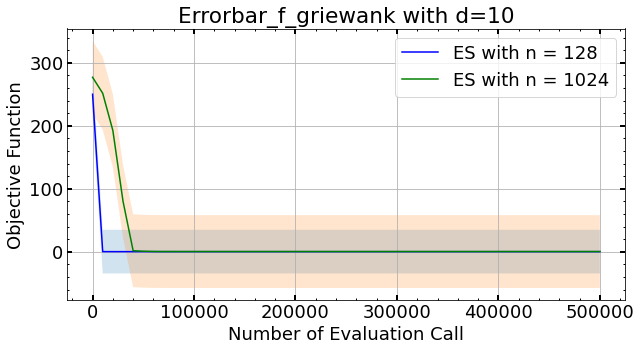

Running ES with d = 10 ; function: f_ackley ; size = 32
Running ES with d = 10 ; function: f_ackley ; size = 64
Running ES with d = 10 ; function: f_ackley ; size = 128
packed for 128 succesfully
Running ES with d = 10 ; function: f_ackley ; size = 256
Running ES with d = 10 ; function: f_ackley ; size = 512
Running ES with d = 10 ; function: f_ackley ; size = 1024
packed for 1024 succesfully
---Drawing---


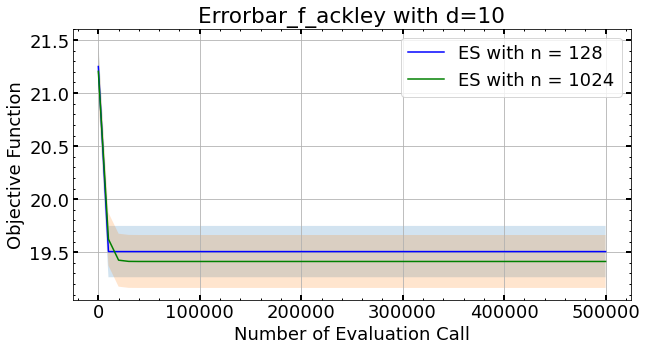

In [ ]:
#Chạy ES
mean_es = [] 
std_es = [] 
ave_call_es = []
data_make_gif_es = [] 
best_index = [] # đánh dấu vị trí best cho từng elements trong num_individuals
for n_element in n_elements:
  
  for function in functions:
    data_for_plot_es = [] # N = 128 và N = 1024
    f_128_es, f_1024_es = 0, 0
    data_call_es = []
    for size in num_individuals:
      print(f"Running ES with d = {n_element} ; function: {name_functions[functions.index(function)]} ; size = {size}")
      data_es = []
      temp_es = []
      temp_call_es = []
      __call__es= []
      gif_flag = 0
      for i in range(10):
        np.random.randint(19520197, 19520207)
        results_es, all_pops_es, n_call_es, z = ES_f(function, bounds[functions.index(function)]*n_element, 1.0, 1.1, 0.6, size)
        #### Data for gif #####
        if n_element == 2 and gif_flag == 0:
          data_make_gif_es.append(all_pops_es) 
          gif_flag = 1 
        #######################
        x_es, f_es = zip(*results_es)
        temp_es.append(list(f_es))
        temp_call_es.append(n_call_es)    
        data_es.append(np.mean(np.array(list(f_es)))) 
        __call__es.append(sum(n_call_es)//len(n_call_es))
      if size == 128 or size == 1024:
          if size == 128 and f_128_es == 0:
            data_for_plot_es.append(temp_es)
            data_call_es.append(temp_call_es)
            f_128_es = 1
            print("packed for 128 succesfully")
          if size == 1024 and f_1024_es == 0:
            data_for_plot_es.append(temp_es)
            data_call_es.append(temp_call_es)
            f_1024_es = 1
            x_es, y_es, std_y_es = xuly_data(data_call_es, data_for_plot_es, n_element, name_functions[functions.index(function)])
            print("packed for 1024 succesfully")
            print("---Drawing---")
            plotting(y_es, name_functions[functions.index(function)], x_es, "ES", n_element, std_y_es)
      #average_call = sum(data_call)//10
      #ave_call.append(average_call)
      mean_Es, std_Es = calculate_mean(np.array(data_es))
      mean_es.append(mean_Es)
      std_es.append(std_Es)
      ave_call_es.append(sum(__call__es)//10)
      

# TABLE


In [ ]:

#Thu data
# d = 2
for i in range(5):
    _mean_de_ = mean_de[i*6: i*6 + 6]
    _std_de_  = std_de[i*6: i*6 + 6]
    _mean_es_ = mean_es[i*6: i*6 + 6]
    _std_es_ = std_es[i*6: i*6 + 6]
    str_es, str_de = [], []
    for j in range(6):
      str_de.append(f"{str(round(_mean_de_[j],2))} ({str(round(_std_de_[j],2))})")
      str_es.append(f"{str(round(_mean_es_[j],2))} ({str(round(_std_es_[j],2))})")
    table = np.hstack((np.array(num_individuals).reshape(-1,1), np.array(str_de).reshape(-1,1), np.array(str_es).reshape(-1,1)))
    table = pd.DataFrame(table, columns = ['Popsize N/Lambda', 'DE', 'ES'])
    table.to_csv(f"{name_functions[i]}_d=2.csv")

# d = 10
for i in range(5):
    _mean_de_ = mean_de[i*6 +30 : i*6 + 36]
    _std_de_  = std_de[i*6 + 30: i*6 + 36]
    _mean_es_ = mean_es[i*6 + 30: i*6 + 36]
    _std_es_ = std_es[i*6 + 30: i*6 + 36]
    str_es, str_de = [], []
    for j in range(6):
      str_de.append(f"{str(round(_mean_de_[j],2))} ({str(round(_std_de_[j],2))})")
      str_es.append(f"{str(round(_mean_es_[j],2))} ({str(round(_std_es_[j],2))})")
    table = np.hstack((np.array(num_individuals).reshape(-1,1), np.array(str_de).reshape(-1,1), np.array(str_es).reshape(-1,1)))
    table = pd.DataFrame(table, columns = ['Popsize N/Lambda', 'DE', 'ES'])
    table.to_csv(f"{name_functions[i]}_d=10.csv")



In [ ]:
num_individuals = [32,64, 128, 256, 512, 1024]
functions_gif = [F_sphere, F_rastrigin, F_rosenbrock , F_griewank, F_ackley]
name_functions_gif = ['sphere', 'rastrigin','rosenbrock', 'griewank', 'ackley']
bounds_gif = [(-5.12, 5.12), (-5.12, 5.12),(-2.048, 2.048), (-600, 600), (-32.768, 32.768)]

# GIF


In [ ]:
#Luu data lam gif 
data_make_gif_, data_make_gif_es_ = [], []
best_idx_arr, best_idx_arr_es = [], []
for function in functions:
    for size in num_individuals:
      print(f"Running DE, ES with d = 2 ; function: {name_functions[functions.index(function)]} ; size = {size}")
      np.random.randint(19520197, 19520207)
      results, all_pops, n_call, best_idx = de(function, bounds[functions.index(function)]*2, 0.8, 0.7, size)
      results_es, all_pops_es, n_call_es, best_idx_es = ES_f(function, bounds[functions.index(function)]*2, 1.0, 1.1, 0.6, size)
      
      #### Data for gif ####
      data_make_gif_es_.append(all_pops_es) 
      data_make_gif_.append(all_pops)
      best_idx_arr.append(best_idx)
      best_idx_arr_es.append(best_idx_es)
      #######################
      print(len(best_idx_arr[-1]), len(best_idx_arr))
      print(len(best_idx_arr_es[-1]), len(best_idx_arr_es))
        



Running DE, ES with d = 2 ; function: f_sphere ; size = 32
592 1
548 1
Running DE, ES with d = 2 ; function: f_sphere ; size = 64
530 2
583 2
Running DE, ES with d = 2 ; function: f_sphere ; size = 128
242 3
308 3
Running DE, ES with d = 2 ; function: f_sphere ; size = 256
138 4
159 4
Running DE, ES with d = 2 ; function: f_sphere ; size = 512
73 5
80 5
Running DE, ES with d = 2 ; function: f_sphere ; size = 1024
28 6
44 6
Running DE, ES with d = 2 ; function: f_rastrigin ; size = 32
27 7
20 7
Running DE, ES with d = 2 ; function: f_rastrigin ; size = 64
31 8
36 8
Running DE, ES with d = 2 ; function: f_rastrigin ; size = 128
30 9
28 9
Running DE, ES with d = 2 ; function: f_rastrigin ; size = 256
32 10
24 10
Running DE, ES with d = 2 ; function: f_rastrigin ; size = 512
28 11
29 11
Running DE, ES with d = 2 ; function: f_rastrigin ; size = 1024
27 12
30 12
Running DE, ES with d = 2 ; function: f_rosenbrock ; size = 32
56 13
317 13
Running DE, ES with d = 2 ; function: f_rosenbrock ; s

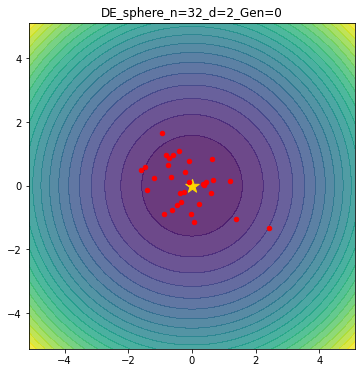

MovieWriter PillowWriter unavailable; using Pillow instead.


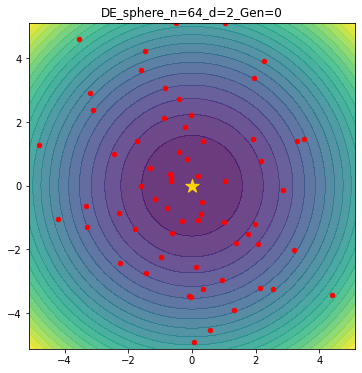

MovieWriter PillowWriter unavailable; using Pillow instead.


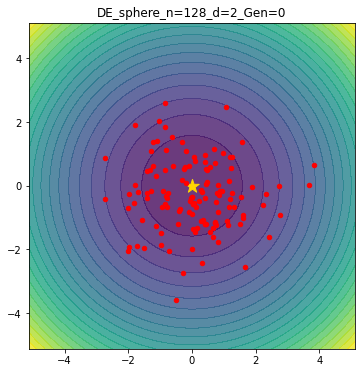

MovieWriter PillowWriter unavailable; using Pillow instead.


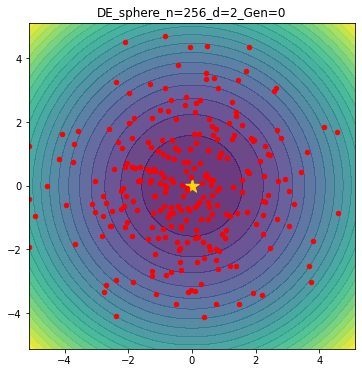

MovieWriter PillowWriter unavailable; using Pillow instead.


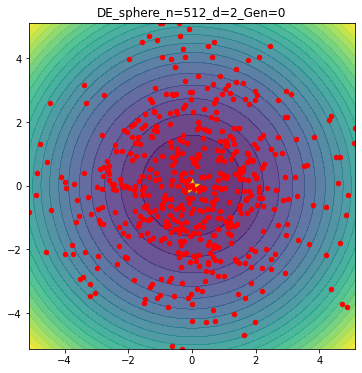

MovieWriter PillowWriter unavailable; using Pillow instead.


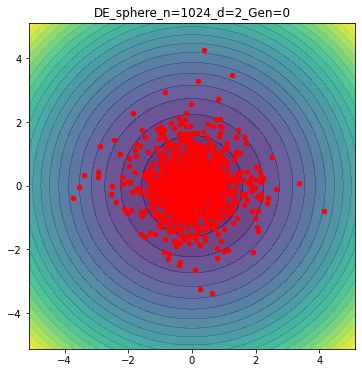

MovieWriter PillowWriter unavailable; using Pillow instead.


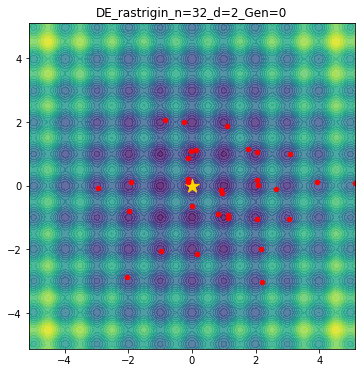

MovieWriter PillowWriter unavailable; using Pillow instead.


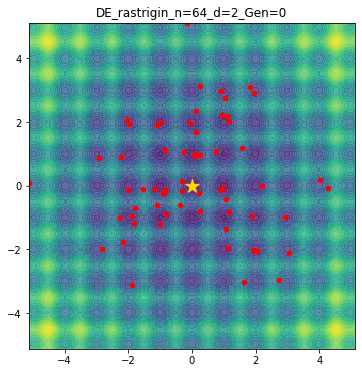

MovieWriter PillowWriter unavailable; using Pillow instead.


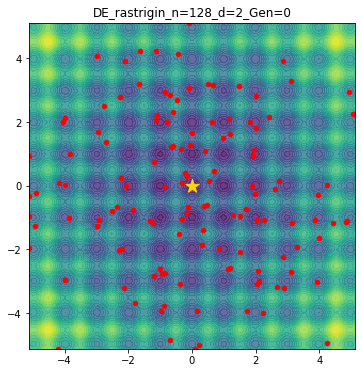

MovieWriter PillowWriter unavailable; using Pillow instead.


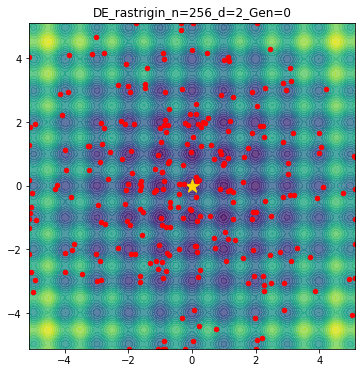

MovieWriter PillowWriter unavailable; using Pillow instead.


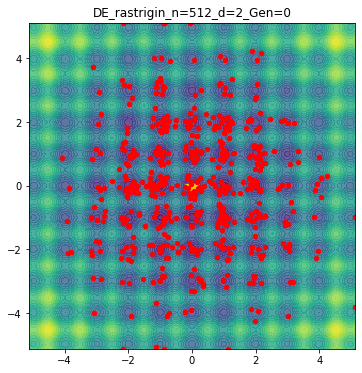

MovieWriter PillowWriter unavailable; using Pillow instead.


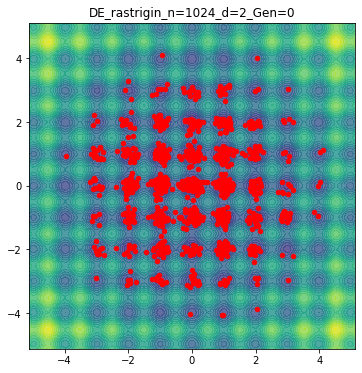

MovieWriter PillowWriter unavailable; using Pillow instead.


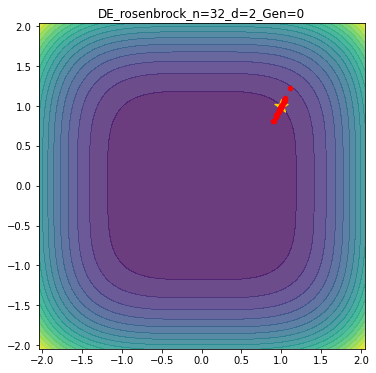

MovieWriter PillowWriter unavailable; using Pillow instead.


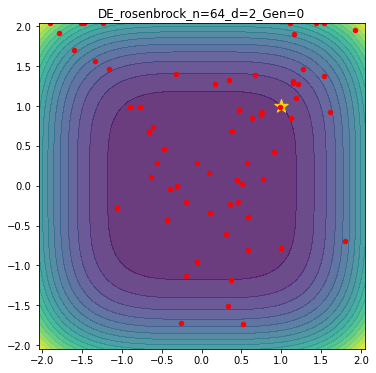

MovieWriter PillowWriter unavailable; using Pillow instead.


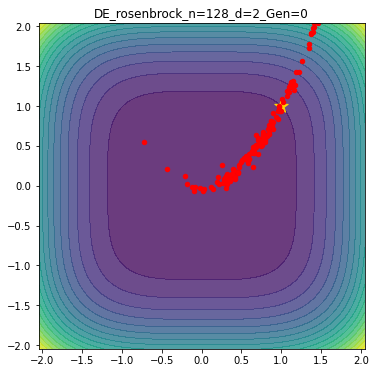

MovieWriter PillowWriter unavailable; using Pillow instead.


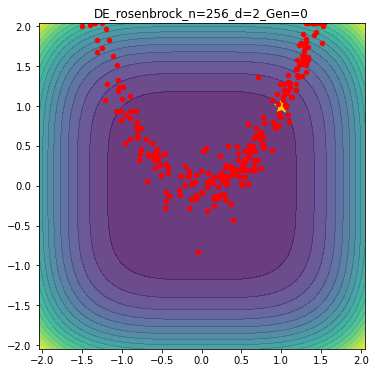

MovieWriter PillowWriter unavailable; using Pillow instead.


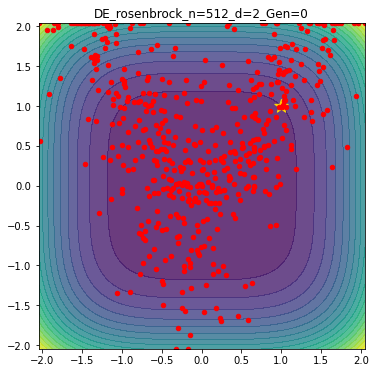

MovieWriter PillowWriter unavailable; using Pillow instead.


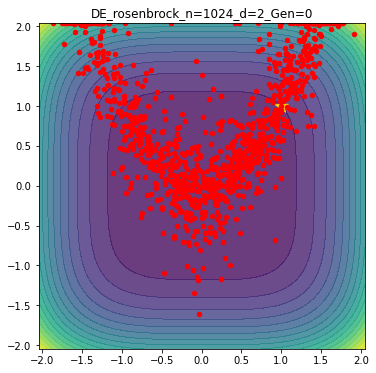

MovieWriter PillowWriter unavailable; using Pillow instead.


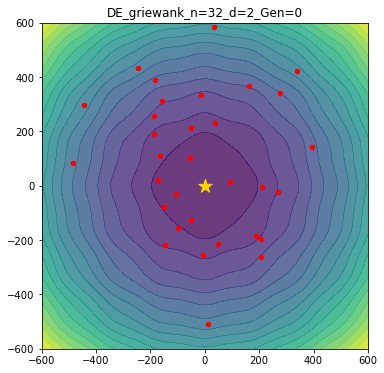

MovieWriter PillowWriter unavailable; using Pillow instead.


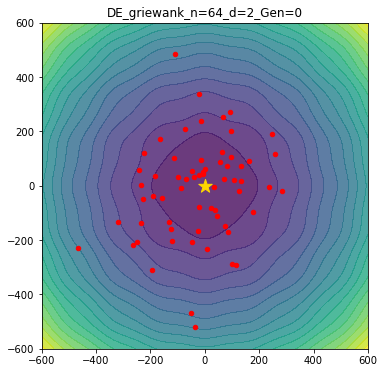

MovieWriter PillowWriter unavailable; using Pillow instead.


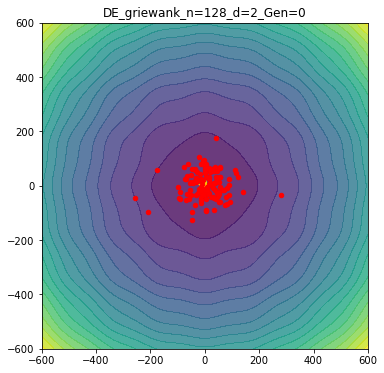

MovieWriter PillowWriter unavailable; using Pillow instead.


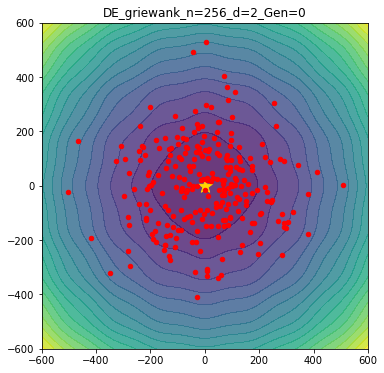

MovieWriter PillowWriter unavailable; using Pillow instead.


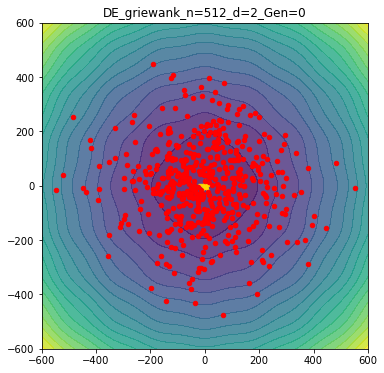

MovieWriter PillowWriter unavailable; using Pillow instead.


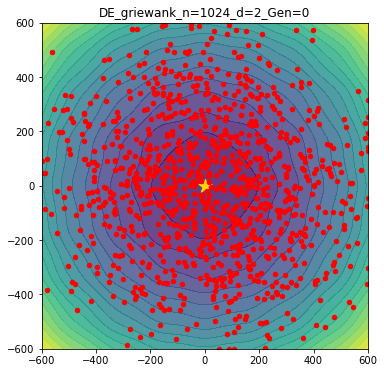

MovieWriter PillowWriter unavailable; using Pillow instead.


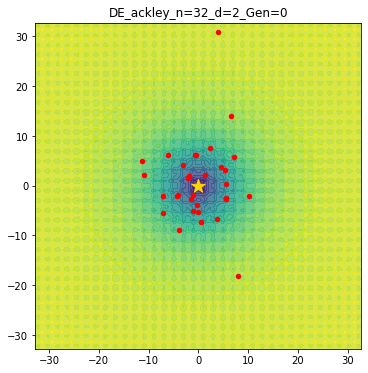

MovieWriter PillowWriter unavailable; using Pillow instead.


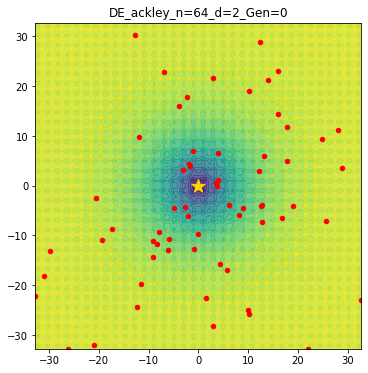

MovieWriter PillowWriter unavailable; using Pillow instead.


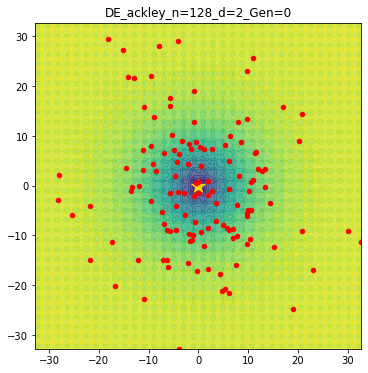

MovieWriter PillowWriter unavailable; using Pillow instead.


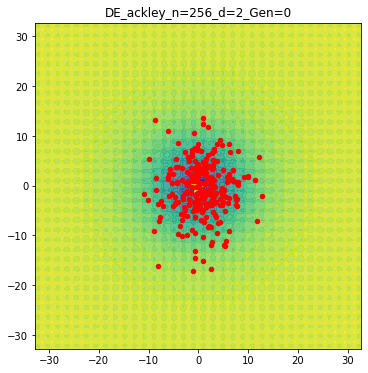

MovieWriter PillowWriter unavailable; using Pillow instead.


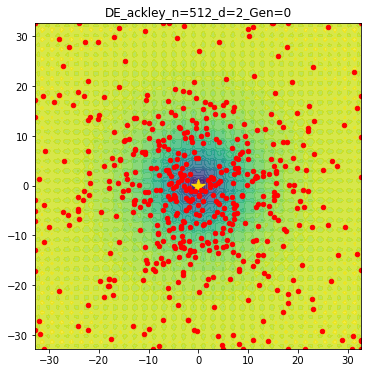

MovieWriter PillowWriter unavailable; using Pillow instead.


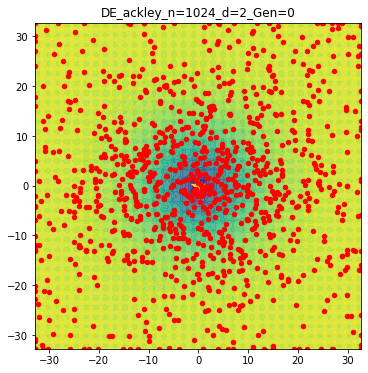

MovieWriter PillowWriter unavailable; using Pillow instead.


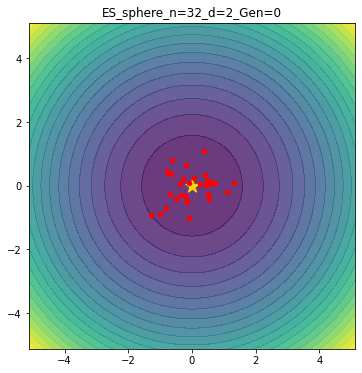

MovieWriter PillowWriter unavailable; using Pillow instead.


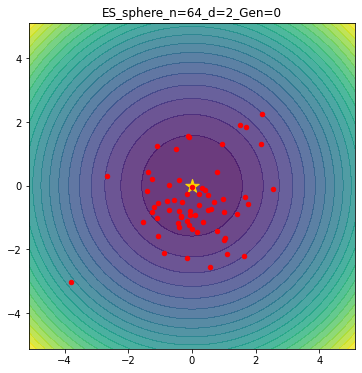

MovieWriter PillowWriter unavailable; using Pillow instead.


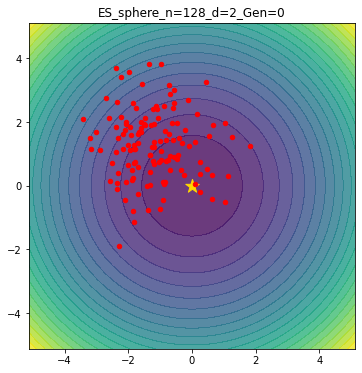

MovieWriter PillowWriter unavailable; using Pillow instead.


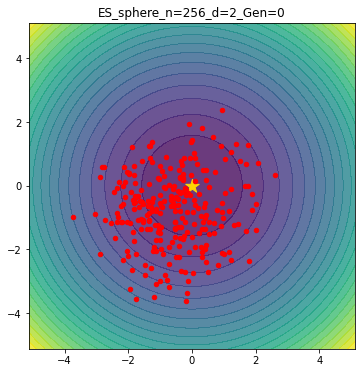

MovieWriter PillowWriter unavailable; using Pillow instead.


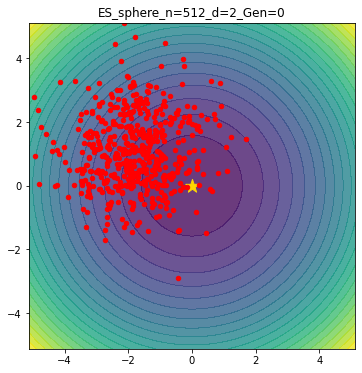

MovieWriter PillowWriter unavailable; using Pillow instead.


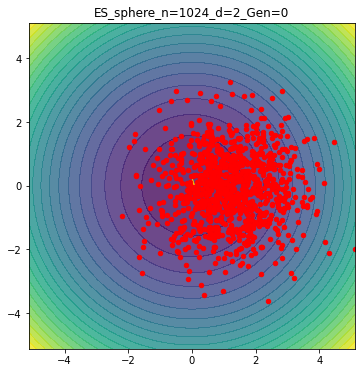

MovieWriter PillowWriter unavailable; using Pillow instead.


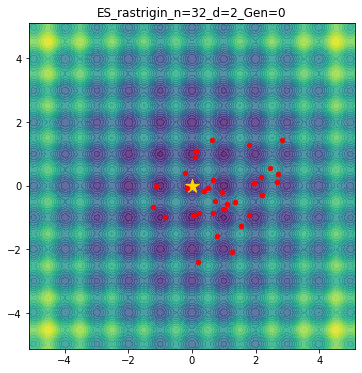

MovieWriter PillowWriter unavailable; using Pillow instead.


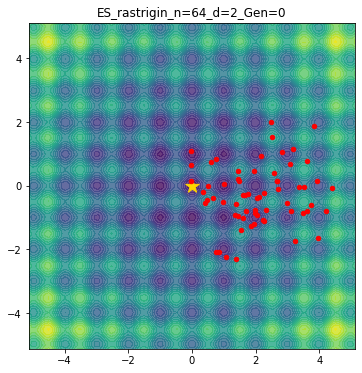

MovieWriter PillowWriter unavailable; using Pillow instead.


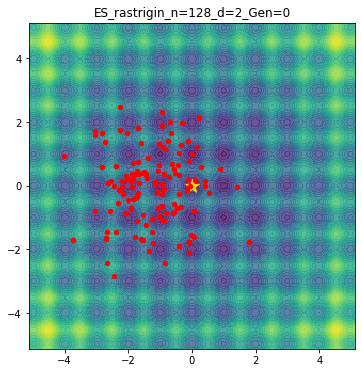

MovieWriter PillowWriter unavailable; using Pillow instead.


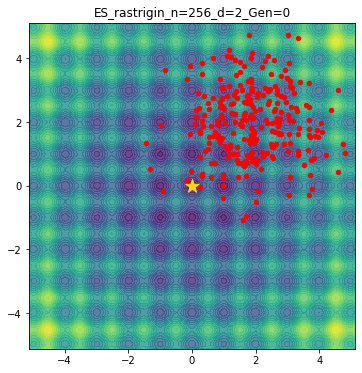

MovieWriter PillowWriter unavailable; using Pillow instead.


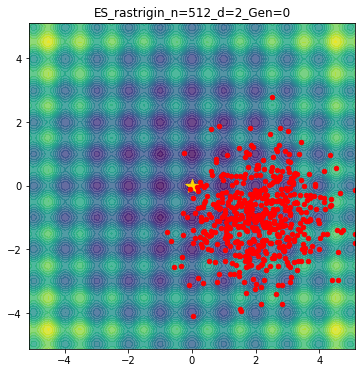

MovieWriter PillowWriter unavailable; using Pillow instead.


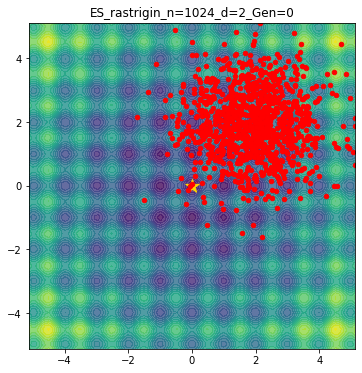

MovieWriter PillowWriter unavailable; using Pillow instead.


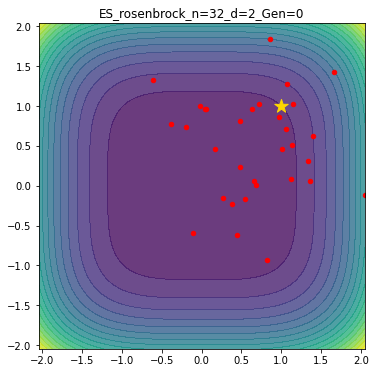

MovieWriter PillowWriter unavailable; using Pillow instead.


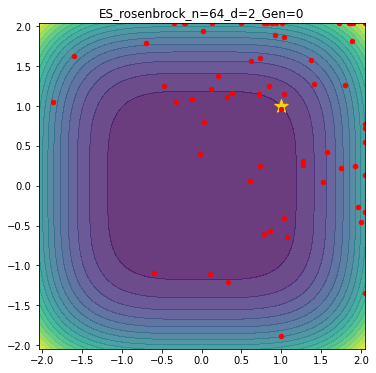

MovieWriter PillowWriter unavailable; using Pillow instead.


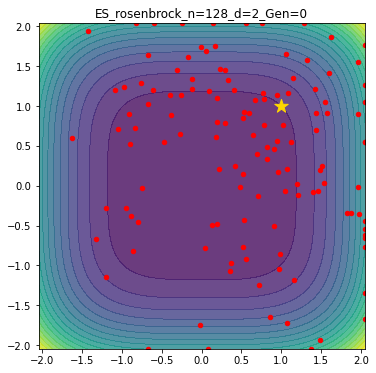

MovieWriter PillowWriter unavailable; using Pillow instead.


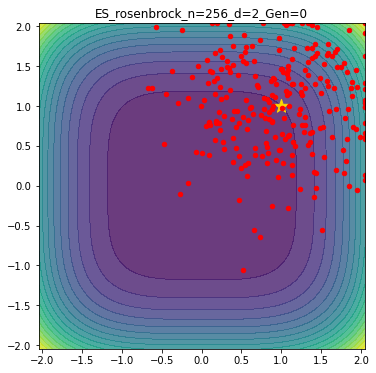

MovieWriter PillowWriter unavailable; using Pillow instead.


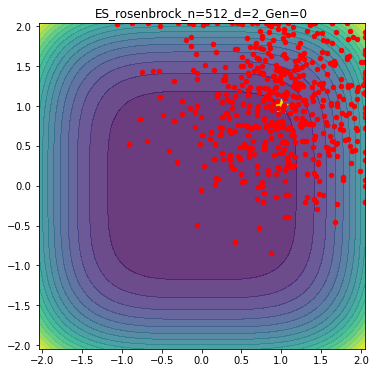

MovieWriter PillowWriter unavailable; using Pillow instead.


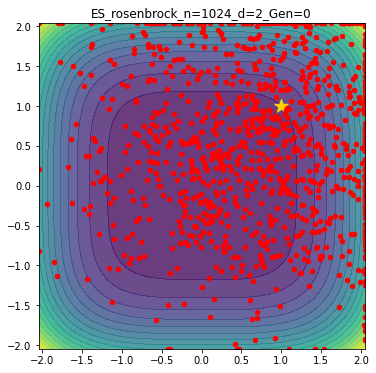

MovieWriter PillowWriter unavailable; using Pillow instead.


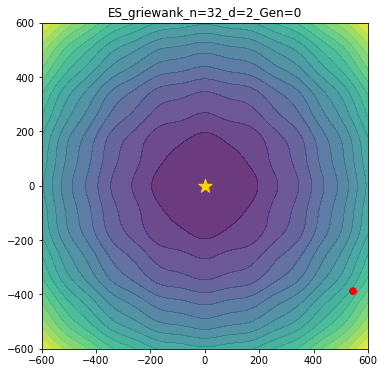

MovieWriter PillowWriter unavailable; using Pillow instead.


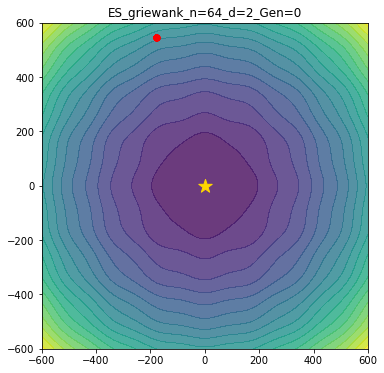

MovieWriter PillowWriter unavailable; using Pillow instead.


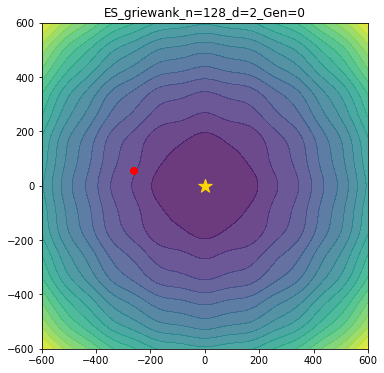

MovieWriter PillowWriter unavailable; using Pillow instead.


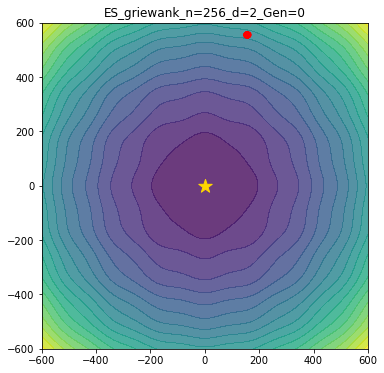

MovieWriter PillowWriter unavailable; using Pillow instead.


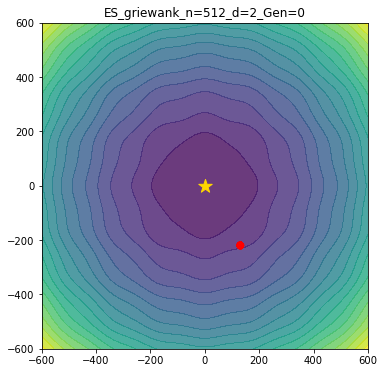

MovieWriter PillowWriter unavailable; using Pillow instead.


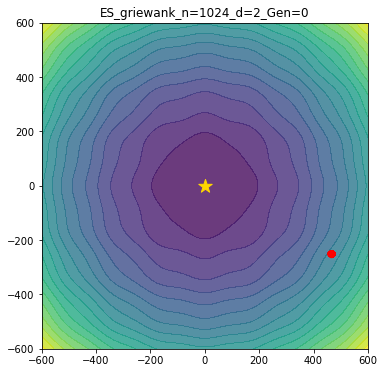

MovieWriter PillowWriter unavailable; using Pillow instead.


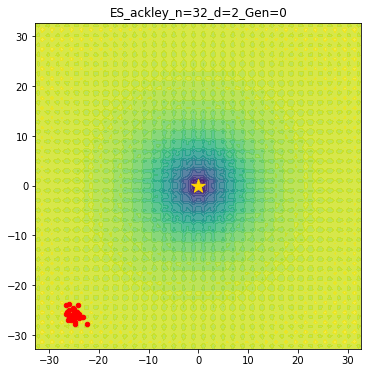

MovieWriter PillowWriter unavailable; using Pillow instead.


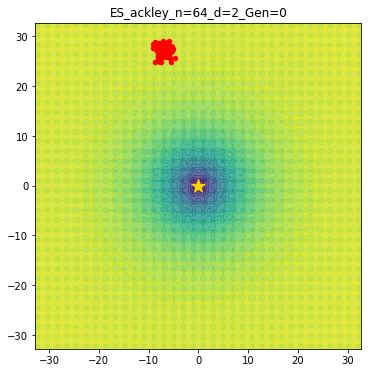

MovieWriter PillowWriter unavailable; using Pillow instead.


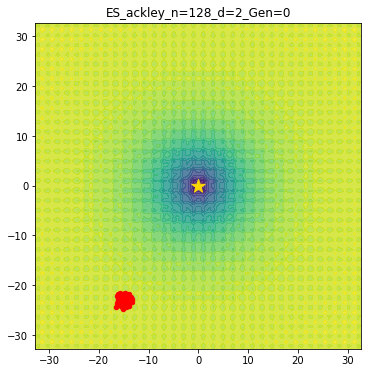

MovieWriter PillowWriter unavailable; using Pillow instead.


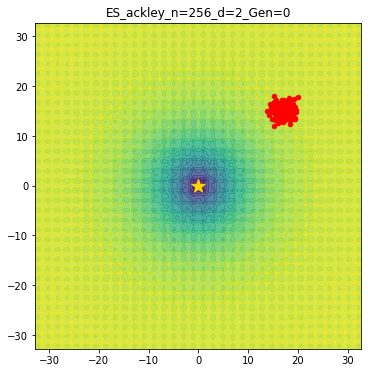

MovieWriter PillowWriter unavailable; using Pillow instead.


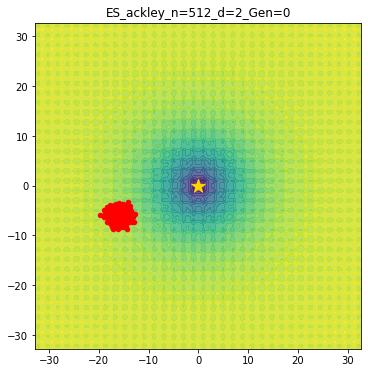

MovieWriter PillowWriter unavailable; using Pillow instead.


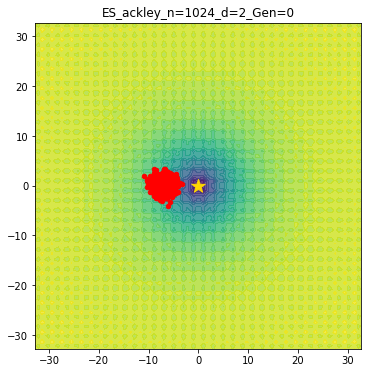

MovieWriter PillowWriter unavailable; using Pillow instead.


In [ ]:
gif_ = [best_idx_arr, best_idx_arr_es]
Name_Type = ['DE', 'ES']
destination = [ [0, 0], [0, 0], [1, 1], [0, 0], [0, 0]]
for_check = [[0.03, 0.03],[0.03, 0.03], [1.03, 1.03],[0.03, 0.03],[0.03, 0.03]]
for gif in gif_:
    k = 0
    for i in range(5):
        for n in num_individuals:
            lower, upper = bounds_gif[i][0], bounds_gif[i][1]
            star_x, star_y = destination[i][0], destination[i][1]
            fig = plt.figure(figsize=(6,6))
            ax1 = fig.subplots()
            x = np.linspace(lower, upper, 100)
            y = np.linspace(lower, upper, 100)
            X, Y = np.meshgrid(x,y)
            Z = functions_gif[i](X, Y)
            ax1.set_title(f'{Name_Type[gif_.index(gif)]}_{name_functions_gif[i]}_n={n}_d=2_Gen=0')
            camera = Camera(fig)

            xrange = len(gif[k])
            
            
            for j in range(0, xrange):
            # for j in range(0,arrayy[gif_.index(gif)][k], arrayy[gif_.index(gif)][k]//30 if arrayy[gif_.index(gif)][k]//30 > 1 else 1):
                
                ax1.contourf(X, Y, Z, 20, cmap = 'viridis', alpha = 0.8)
                ax1.axis('square')
                ax1.set_xlim(lower,upper)
                ax1.set_ylim(lower,upper)
                ax1.scatter(star_x, star_y,s=200, marker='*', color='gold')
                ax1.scatter(gif[k][j][:,0], gif[k][j][:,1], s=20, c='red')
                plt.pause(0.1)
                camera.snap()
                
                check_valid_x = [0 if abs(_) < for_check[i][0] else 1 for _ in gif[k][j][:,0]]
                check_valid_y = [0 if abs(_) < for_check[i][1] else 1 for _ in gif[k][j][:,1]]
                #print(check_valid_x, check_valid_y)
                if 1 not in check_valid_x and 1 not in check_valid_y: break
                ax1.set_title(f'{Name_Type[gif_.index(gif)]}_{name_functions_gif[i]}_n={n}_d=2_Gen={j+1}')



            k+=1
            animation = camera.animate()
            animation.save(f'./gif/{Name_Type[gif_.index(gif)]}/{name_functions_gif[i]}/{Name_Type[gif_.index(gif)]}_using_{name_functions_gif[i]}_with_N={n}_and_d=2.gif', writer='PillowWriter', fps=2)